Mounting Google Drive...
Mounted at /content/drive

 Google Drive mounted successfully!
 Drive path: /content/drive/MyDrive

Searching for zip file...

 Found zip file!
  Path: /content/drive/MyDrive/comp-90086-nutrition-5-k.zip
  Size: 2.89 GB

Extracting zip file to Colab workspace...

Extracting to: /content/nutrition_data
This may take 2-5 minutes for a 2.89 GB file...
Total files to extract: 10472

 Extraction completed in 71.6 seconds!

Locating dataset structure...

Extracted contents:
total 16
drwxr-xr-x 3 root root 4096 Oct 22 13:13 .
drwxr-xr-x 1 root root 4096 Oct 22 13:11 ..
drwxr-xr-x 3 root root 4096 Oct 22 13:11 Nutrition5K
-rw-r--r-- 1 root root   56 Oct 22 13:13 sample_submission.csv

Searching for train/test directories...
/content/nutrition_data/Nutrition5K/Nutrition5K/test
/content/nutrition_data/Nutrition5K/Nutrition5K/train

 Found DATA_ROOT: /content/nutrition_data/Nutrition5K/Nutrition5K

Verifying dataset at: /content/nutrition_data/Nutrition5K/Nutrition5K
yes 

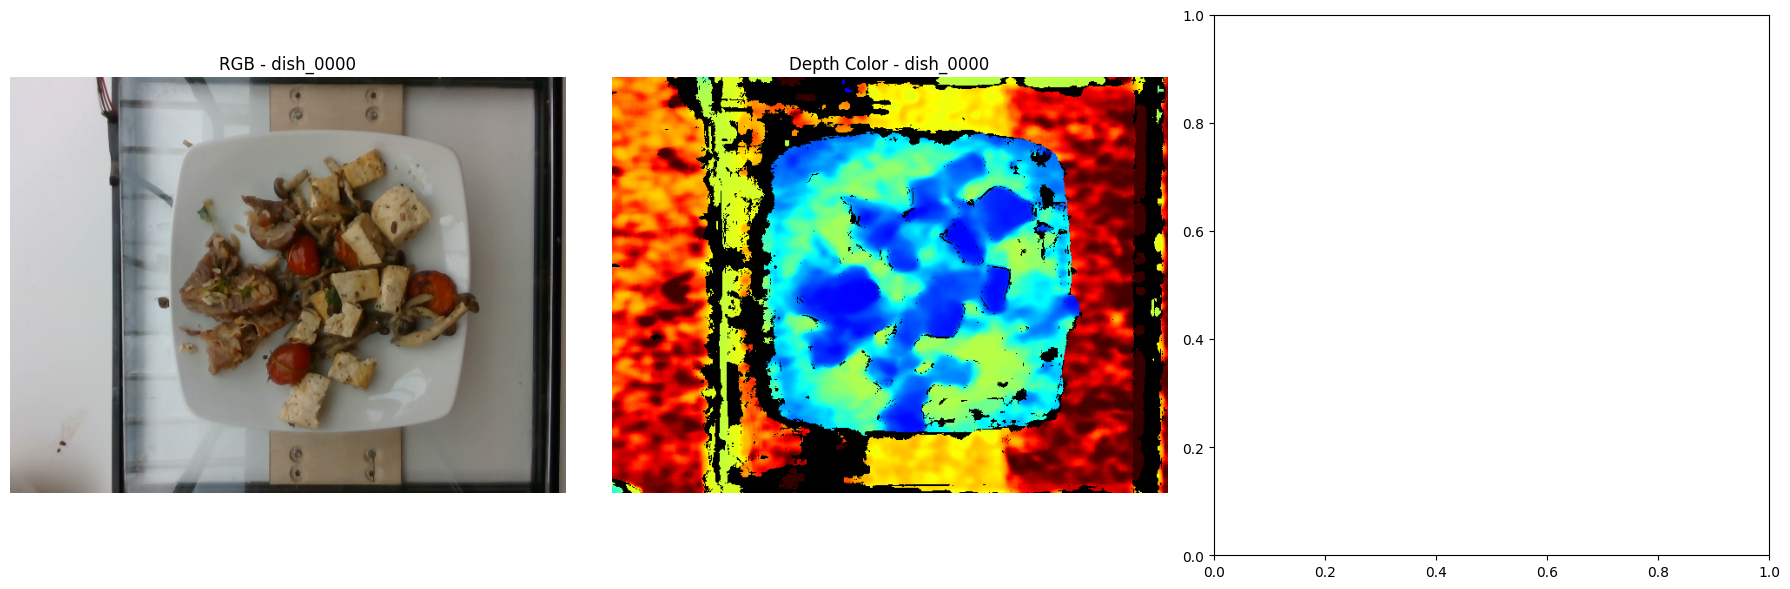

 Sample visualization complete

Loading training labels...

 Loaded 3301 training samples

Columns: ['ID', 'Value']

First 5 rows:


,ID,Value
0,dish_0000,221.167068
1,dish_0001,140.980011
2,dish_0002,274.335999
3,dish_0003,589.501648
4,dish_0004,258.599670



Calorie Statistics:
  Mean:   237.37 calories
  Median: 186.96 calories
  Std:    221.33 calories
  Min:    0.00 calories
  Max:    3943.33 calories


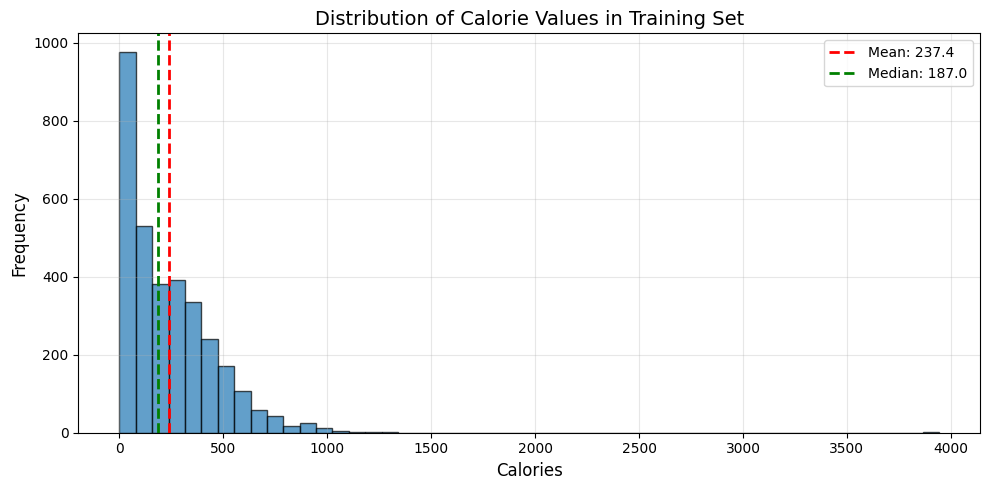


SETUP SUMMARY

 ALL SETUP COMPLETED SUCCESSFULLY!

 Paths Configuration:
  DATA_ROOT = Path('/content/nutrition_data/Nutrition5K/Nutrition5K')
  TRAIN_CSV = Path('/content/nutrition_data/Nutrition5K/Nutrition5K/nutrition5k_train.csv')

 Dataset Info:
  Training samples: 3301
  Training images: 3301
  Test images: 189

 Ready to proceed to next step: Import libraries and define model!



In [1]:
# ==========================================
# Step 1: Mount Google Drive
# ==========================================
print("="*70)
print("Mounting Google Drive...")
print("="*70)

from google.colab import drive
import os
import zipfile
from pathlib import Path
import time

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

print("\n Google Drive mounted successfully!")
print(f" Drive path: /content/drive/MyDrive")

# ==========================================
# Step 2: Search for your zip file
# ==========================================
print("\n" + "="*70)
print("Searching for zip file...")
print("="*70)

# Zip file is in your Google Drive root directory
ZIP_PATH = Path('/content/drive/MyDrive/comp-90086-nutrition-5-k.zip')

# Check if file exists
if ZIP_PATH.exists():
    file_size = ZIP_PATH.stat().st_size / (1024**3)  # GB
    print(f"\n Found zip file!")
    print(f"  Path: {ZIP_PATH}")
    print(f"  Size: {file_size:.2f} GB")
else:
    print(f"\n Zip file not found at: {ZIP_PATH}")
    print("\nSearching in Google Drive...")

    # Search for zip files
    !find /content/drive/MyDrive -name "*.zip" -type f 2>/dev/null | head -10

    print("\n Please check the output above and update ZIP_PATH")
    print("Example:")
    print("  ZIP_PATH = Path('/content/drive/MyDrive/your-folder/comp-90086-nutrition-5-k.zip')")

# ==========================================
# Step 3: Extract to Colab local workspace
# ==========================================
if ZIP_PATH.exists():
    print("\n" + "="*70)
    print("Extracting zip file to Colab workspace...")
    print("="*70)

    # Extract to /content/ directory (Colab's working directory)
    EXTRACT_PATH = Path('/content/nutrition_data')
    EXTRACT_PATH.mkdir(exist_ok=True)

    print(f"\nExtracting to: {EXTRACT_PATH}")
    print("This may take 2-5 minutes for a 2.89 GB file...")

    start_time = time.time()

    try:
        with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
            # Show progress
            file_list = zip_ref.namelist()
            total_files = len(file_list)
            print(f"Total files to extract: {total_files}")

            # Extract all files
            zip_ref.extractall(EXTRACT_PATH)

        elapsed_time = time.time() - start_time
        print(f"\n Extraction completed in {elapsed_time:.1f} seconds!")

    except Exception as e:
        print(f"\n Error during extraction: {e}")
        print("\nTrying alternative method...")

        # Alternative method: use system command
        !unzip -q /content/drive/MyDrive/comp-90086-nutrition-5-k.zip -d /content/nutrition_data
        print(" Extraction completed using system command!")

# ==========================================
# Step 4: Locate dataset structure
# ==========================================
print("\n" + "="*70)
print("Locating dataset structure...")
print("="*70)

# List extracted contents
print("\nExtracted contents:")
!ls -la /content/nutrition_data

# Search for possible data directories
print("\nSearching for train/test directories...")
!find /content/nutrition_data -type d -name "train" -o -name "test" | head -10

# Try to automatically find data root directory
possible_roots = [
    Path('/content/nutrition_data'),
    Path('/content/nutrition_data/Nutrition5K'),
    Path('/content/nutrition_data/Nutrition5K/Nutrition5K'),
    Path('/content/nutrition_data/nutrition5k'),
]

DATA_ROOT = None
for root_path in possible_roots:
    if root_path.exists():
        train_color = root_path / 'train' / 'color'
        if train_color.exists():
            DATA_ROOT = root_path
            print(f"\n Found DATA_ROOT: {DATA_ROOT}")
            break

if DATA_ROOT is None:
    print("\n Could not auto-detect DATA_ROOT")
    print("Listing all subdirectories:")
    !find /content/nutrition_data -maxdepth 3 -type d

# ==========================================
# Step 5: Verify dataset structure
# ==========================================
def verify_dataset(root_path):
    """Verify dataset structure"""
    root = Path(root_path)

    print(f"\n{'='*70}")
    print(f"Verifying dataset at: {root}")
    print(f"{'='*70}")

    # Check required directories
    required_dirs = {
        'train/color': None,
        'train/depth_color': None,
        'train/depth_raw': None,
        'test/color': None,
        'test/depth_color': None,
        'test/depth_raw': None
    }

    all_exist = True
    for dir_name in required_dirs.keys():
        full_path = root / dir_name
        exists = full_path.exists()
        status = "yes" if exists else "no"

        if exists:
            # Count number of samples
            try:
                samples = [d for d in full_path.iterdir() if d.is_dir()]
                num_samples = len(samples)
                required_dirs[dir_name] = num_samples
                print(f"{status} {dir_name:<25} {num_samples:>4} samples")
            except:
                print(f"{status} {dir_name:<25} exists but can't count samples")
        else:
            print(f"{status} {dir_name:<25} NOT FOUND")
            all_exist = False

    # Check CSV files
    print(f"\n{'CSV Files:'}")
    csv_candidates = [
        root / "nutrition5k_train.csv",
        root / "train" / "nutrition5k_train.csv",
        root / "metadata" / "nutrition5k_train.csv",
    ]

    csv_found = None
    for csv_path in csv_candidates:
        if csv_path.exists():
            csv_found = csv_path
            file_size = csv_path.stat().st_size / 1024  # KB
            print(f" {csv_path.name:<30} ({file_size:.1f} KB)")
            break

    if not csv_found:
        print(" No CSV file found in standard locations")
        print("\nSearching for CSV files...")
        !find {root} -name "*.csv" -type f

    return all_exist, csv_found

if DATA_ROOT:
    is_valid, csv_path = verify_dataset(DATA_ROOT)

    if is_valid:
        print(f"\n{'='*70}")
        print(" Dataset validation PASSED!")
        print(f"{'='*70}")
        TRAIN_CSV = csv_path
    else:
        print(f"\n{'='*70}")
        print(" Dataset validation FAILED - some directories missing")
        print(f"{'='*70}")

# ==========================================
# Step 6: Visualize sample images
# ==========================================
if DATA_ROOT and (DATA_ROOT / 'train' / 'color').exists():
    print(f"\n{'='*70}")
    print("Visualizing sample images...")
    print(f"{'='*70}")

    import matplotlib.pyplot as plt
    from PIL import Image

    # Get first sample
    train_color_dir = DATA_ROOT / 'train' / 'color'
    sample_dirs = sorted([d for d in train_color_dir.iterdir() if d.is_dir()])

    if len(sample_dirs) > 0:
        sample_id = sample_dirs[0].name
        print(f"\nShowing sample: {sample_id}")

        rgb_path = DATA_ROOT / 'train' / 'color' / sample_id / 'rgb.png'
        depth_color_path = DATA_ROOT / 'train' / 'depth_color' / sample_id / 'depth_color.png'
        depth_raw_path = DATA_ROOT / 'train' / 'depth_raw' / sample_id / 'depth.png'

        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        if rgb_path.exists():
            rgb = Image.open(rgb_path)
            axes[0].imshow(rgb)
            axes[0].set_title(f'RGB - {sample_id}', fontsize=12)
            axes[0].axis('off')

        if depth_color_path.exists():
            depth_color = Image.open(depth_color_path)
            axes[1].imshow(depth_color)
            axes[1].set_title(f'Depth Color - {sample_id}', fontsize=12)
            axes[1].axis('off')

        if depth_raw_path.exists():
            import cv2
            depth_raw = cv2.imread(str(depth_raw_path), cv2.IMREAD_ANYDEPTH)
            if depth_raw is not None:
                depth_raw_norm = cv2.normalize(depth_raw, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
                axes[2].imshow(depth_raw_norm, cmap='gray')
                axes[2].set_title(f'Depth Raw - {sample_id}', fontsize=12)
                axes[2].axis('off')

        plt.tight_layout()
        plt.show()

        print(f" Sample visualization complete")

# ==========================================
# Step 7: Load training labels
# ==========================================
if DATA_ROOT and TRAIN_CSV and TRAIN_CSV.exists():
    print(f"\n{'='*70}")
    print("Loading training labels...")
    print(f"{'='*70}")

    import pandas as pd

    train_df = pd.read_csv(TRAIN_CSV)

    print(f"\n Loaded {len(train_df)} training samples")
    print(f"\nColumns: {list(train_df.columns)}")
    print(f"\nFirst 5 rows:")
    display(train_df.head())

    print(f"\n{'Calorie Statistics:'}")
    print(f"  Mean:   {train_df['Value'].mean():.2f} calories")
    print(f"  Median: {train_df['Value'].median():.2f} calories")
    print(f"  Std:    {train_df['Value'].std():.2f} calories")
    print(f"  Min:    {train_df['Value'].min():.2f} calories")
    print(f"  Max:    {train_df['Value'].max():.2f} calories")

    # Plot distribution
    plt.figure(figsize=(10, 5))
    plt.hist(train_df['Value'], bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Calories', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Calorie Values in Training Set', fontsize=14)
    plt.axvline(train_df['Value'].mean(), color='r', linestyle='--',
                linewidth=2, label=f'Mean: {train_df["Value"].mean():.1f}')
    plt.axvline(train_df['Value'].median(), color='g', linestyle='--',
                linewidth=2, label=f'Median: {train_df["Value"].median():.1f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# ==========================================
# Step 8: Final summary
# ==========================================
print(f"\n{'='*70}")
print("SETUP SUMMARY")
print(f"{'='*70}")

if DATA_ROOT and TRAIN_CSV:
    print("\n ALL SETUP COMPLETED SUCCESSFULLY!")
    print(f"\n Paths Configuration:")
    print(f"  DATA_ROOT = Path('{DATA_ROOT}')")
    print(f"  TRAIN_CSV = Path('{TRAIN_CSV}')")

    print(f"\n Dataset Info:")
    if 'train_df' in locals():
        print(f"  Training samples: {len(train_df)}")

    # Check training sample count
    train_color_dir = DATA_ROOT / 'train' / 'color'
    test_color_dir = DATA_ROOT / 'test' / 'color'
    if train_color_dir.exists():
        num_train = len([d for d in train_color_dir.iterdir() if d.is_dir()])
        print(f"  Training images: {num_train}")
    if test_color_dir.exists():
        num_test = len([d for d in test_color_dir.iterdir() if d.is_dir()])
        print(f"  Test images: {num_test}")

    print(f"\n Ready to proceed to next step: Import libraries and define model!")

else:
    print("\n Setup incomplete!")
    if not DATA_ROOT:
        print("  ✗ DATA_ROOT not found")
    if not TRAIN_CSV:
        print("  ✗ TRAIN_CSV not found")
    print("\nPlease check the output above and manually set the paths.")

print(f"{'='*70}\n")

In [2]:
# ==========================================
# Step 1: Install and import all necessary libraries
# ==========================================
print("="*70)
print("Environment Setup")
print("="*70)

# Install necessary packages
!pip install -q torch torchvision
!pip install -q scikit-learn
!pip install -q opencv-python-headless

# Import all libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF

import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
import warnings
import time
from tqdm.auto import tqdm

warnings.filterwarnings('ignore')

# Set random seed
def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n PyTorch version: {torch.__version__}")
print(f" Computing device: {device}")

if torch.cuda.is_available():
    print(f" GPU: {torch.cuda.get_device_name(0)}")
    print(f" GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# Set data paths (according to your file structure)
DATA_ROOT = Path('/content/nutrition_data/Nutrition5K/Nutrition5K')
TRAIN_CSV = DATA_ROOT / 'nutrition5k_train.csv'
SAMPLE_SUBMISSION = DATA_ROOT / 'nutrition5k_train.csv'

print(f"\n Data root directory: {DATA_ROOT}")
print(f" Training CSV: {TRAIN_CSV}")
print(f" Submission template: {SAMPLE_SUBMISSION}")
print("="*70)

Environment Setup

 PyTorch version: 2.8.0+cu126
 Computing device: cuda
 GPU: NVIDIA A100-SXM4-80GB
 GPU memory: 85.17 GB

 Data root directory: /content/nutrition_data/Nutrition5K/Nutrition5K
 Training CSV: /content/nutrition_data/Nutrition5K/Nutrition5K/nutrition5k_train.csv
 Submission template: /content/nutrition_data/Nutrition5K/Nutrition5K/nutrition5k_train.csv


In [3]:
# ==========================================
# Step 2 (fixed): Paired augmentation + 4-channel (RGB + depth_raw) dataset
# ==========================================
print("="*70)
print(" Step 2 (fixed): Data Loading for 4-Channel Input")
print("="*70)

import random, torch, os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# ---------- paths ----------
BASE_DIR = Path('/content/nutrition_data/Nutrition5K/Nutrition5K')
TRAIN_CSV = BASE_DIR / 'nutrition5k_train.csv'
RGB_DIR_TRAIN  = BASE_DIR / 'train' / 'color'
DEPTH_RAW_TRAIN = BASE_DIR / 'train' / 'depth_raw'
RGB_DIR_TEST   = BASE_DIR / 'test' / 'color'
DEPTH_RAW_TEST  = BASE_DIR / 'test' / 'depth_raw'

assert BASE_DIR.exists(), f"Base dir not found: {BASE_DIR}"
assert TRAIN_CSV.exists(), f"CSV not found: {TRAIN_CSV}"
for d in [RGB_DIR_TRAIN, DEPTH_RAW_TRAIN]:
    assert d.exists(), f"Missing dir: {d}"

# ---------- depth normalization ----------
def normalize_depth_raw(depth_img: Image.Image):
    """Convert raw depth (any mode) to float32 [0,1] with percentile clipping."""
    d = np.array(depth_img.convert("L"), dtype=np.float32)
    lo, hi = np.percentile(d, [1, 99])
    d = np.clip(d, lo, hi)
    d = (d - d.min()) / max(1e-6, (d.max() - d.min()))
    return d  # HxW float32 in [0,1]

# ---------- paired augmentation (sync geom; color jitter only on RGB) ----------
class PairedTransform:
    def __init__(self, image_size=224, is_training=True):
        self.image_size = image_size
        self.is_training = is_training

    def __call__(self, rgb, depth):
        # resize->random crop (train) / center crop (val)
        rgb = TF.resize(rgb, (256, 256), interpolation=Image.BICUBIC)
        depth = TF.resize(depth, (256, 256), interpolation=Image.NEAREST)

        if self.is_training:
            i, j, h, w = transforms.RandomCrop.get_params(rgb, output_size=(self.image_size, self.image_size))
            rgb = TF.crop(rgb, i, j, h, w)
            depth = TF.crop(depth, i, j, h, w)

            if random.random() < 0.5:
                rgb = TF.hflip(rgb)
                depth = TF.hflip(depth)

            # small rotation (synchronized)
            angle = random.uniform(-10, 10)
            rgb = TF.rotate(rgb, angle)
            depth = TF.rotate(depth, angle)

            # light color jitter for RGB only
            rgb = transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.02)(rgb)
        else:
            rgb = TF.center_crop(rgb, self.image_size)
            depth = TF.center_crop(depth, self.image_size)

        return rgb, depth

to_tensor = transforms.ToTensor()
train_tf = PairedTransform(224, True)
val_tf   = PairedTransform(224, False)

# ---------- io helpers (flat files; try multiple extensions) ----------
IMG_EXTS = [".jpg", ".jpeg", ".png"]

def find_file(dir_path: Path, stem: str):
    for ext in IMG_EXTS:
        p = dir_path / f"{stem}{ext}"
        if p.exists():
            return p
    return None

# ---------- dataset returning 4-channel tensor ----------
class Nutrition4ChDataset(Dataset):
    """
    Returns:
      x4: 4xHxW tensor [R,G,B,Depth] ; y: float (if available) ; dish_id: str
    """
    def __init__(self, df, split="train", transform=None, has_label=True):
        self.df = df.reset_index(drop=True)
        self.split = split
        self.transform = transform
        self.has_label = has_label

        if split == "train":
            self.rgb_dir = RGB_DIR_TRAIN
            self.depth_dir = DEPTH_RAW_TRAIN
        else:
            self.rgb_dir = RGB_DIR_TEST
            self.depth_dir = DEPTH_RAW_TEST

        # column names: allow both ('dish_id','calories') or ('ID','Value')
        cols = self.df.columns.tolist()
        self.id_col = 'dish_id' if 'dish_id' in cols else ('ID' if 'ID' in cols else cols[0])
        self.y_col  = 'calories' if 'calories' in cols else ('Value' if 'Value' in cols else None)

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        did = str(row[self.id_col])

        # read RGB (flat)
        p_rgb = find_file(self.rgb_dir, did)
        if p_rgb is None:
            # fallback: common nested mistake
            p_rgb = (self.rgb_dir / did / "rgb.png")
        if not p_rgb.exists():
            raise FileNotFoundError(f"RGB not found for id={did} under {self.rgb_dir}")
        rgb = Image.open(p_rgb).convert("RGB")

        # read depth_raw (flat)
        p_dep = find_file(self.depth_dir, did)
        if p_dep is None:
            p_dep = (self.depth_dir / did / "depth_raw.png")
        if not p_dep.exists():
            raise FileNotFoundError(f"Depth RAW not found for id={did} under {self.depth_dir}")
        dep = Image.open(p_dep)

        # paired augment
        rgb, dep = (self.transform(rgb, dep) if self.transform else (rgb, dep))

        # to tensors: RGB -> [0,1] & normalize; Depth -> [0,1] single channel
        rgb_t = to_tensor(rgb)  # 3xHxW
        d_norm = normalize_depth_raw(dep)  # HxW float32 in [0,1]
        dep_t = torch.from_numpy(d_norm).unsqueeze(0)  # 1xHxW

        # ImageNet norm for RGB
        rgb_t = TF.normalize(rgb_t, mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])

        x4 = torch.cat([rgb_t, dep_t], dim=0)  # 4xHxW

        if self.has_label and self.y_col is not None:
            y = float(row[self.y_col])
            y = torch.tensor(y, dtype=torch.float32)
            return x4, y, did
        else:
            return x4, did

# ---------- load CSV and split ----------
train_df = pd.read_csv(TRAIN_CSV)
# accept either ('dish_id','calories') or ('ID','Value')
id_col = 'dish_id' if 'dish_id' in train_df.columns else ('ID' if 'ID' in train_df.columns else train_df.columns[0])
y_col  = 'calories' if 'calories' in train_df.columns else ('Value' if 'Value' in train_df.columns else train_df.columns[1])

train_df_split, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# ---------- datasets & loaders ----------
batch_size = 16
num_workers = 2

train_dataset = Nutrition4ChDataset(train_df_split, split="train", transform=train_tf, has_label=True)
val_dataset   = Nutrition4ChDataset(val_df, split="train", transform=val_tf, has_label=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=num_workers, pin_memory=True, drop_last=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

print("\n Sanity check:")
x4, y, did = next(iter(train_loader))
print("x4 shape (B,4,H,W):", x4.shape)
print("y shape:", y.shape, "sample:", y[:5].cpu().numpy())
print("sample ids:", list(did[:3]))
print("\n Step 2 (fixed) complete.")


 Step 2 (fixed): Data Loading for 4-Channel Input

 Sanity check:
x4 shape (B,4,H,W): torch.Size([16, 4, 224, 224])
y shape: torch.Size([16]) sample: [268.38     65.48    333.63568 497.91583  30.75   ]
sample ids: ['dish_1348', 'dish_1145', 'dish_1802']

 Step 2 (fixed) complete.


In [4]:
# ==========================================
# Hybrid CNN-ViT: ConvStem ➜ ViT encoder ➜ regressor head
# ==========================================
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---- 1) Conv front-end (local bias + downsampling) ----
class ConvStem(nn.Module):
    def __init__(self, in_ch=4, out_ch=64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch, 32, 3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(32), nn.GELU(),
            nn.Conv2d(32, out_ch, 3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(out_ch), nn.GELU(),
        )
    def forward(self, x):          # B,4,224,224
        return self.net(x)         # B,64,56,56

# ---- 2) Patch embedding on ConvStem features ----
class ConvPatchEmbed(nn.Module):
    def __init__(self, in_ch=64, embed_dim=256, patch=8):
        super().__init__()
        # Here patch conv runs on ConvStem output; stride=patch
        self.proj = nn.Conv2d(in_ch, embed_dim, kernel_size=patch, stride=patch, bias=False)
        self.norm = nn.LayerNorm(embed_dim)
    def forward(self, x):          # B,64,56,56 (for patch=8 -> 7x7 tokens)
        x = self.proj(x)           # B,D,7,7
        x = x.flatten(2).transpose(1, 2)  # B,N,D
        return self.norm(x)

# ---- 3) Transformer encoder block ----
class MLP(nn.Module):
    def __init__(self, dim, mlp_ratio=3.0, drop=0.0):
        super().__init__()
        hidden = int(dim * mlp_ratio)
        self.fc1 = nn.Linear(dim, hidden)
        self.act = nn.GELU()
        self.fc2 = nn.Linear(hidden, dim)
        self.drop = nn.Dropout(drop)
    def forward(self, x):
        return self.drop(self.fc2(self.drop(self.act(self.fc1(x)))))

class Block(nn.Module):
    def __init__(self, dim, heads, mlp_ratio=3.0, attn_drop=0.0, proj_drop=0.0, drop_path_rate=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn  = nn.MultiheadAttention(dim, heads, dropout=attn_drop, batch_first=True)
        self.drop  = nn.Dropout(proj_drop)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp   = MLP(dim, mlp_ratio, proj_drop)
        self.drop_path = nn.Identity()  # keep simple; can swap to timm's DropPath if available

    def forward(self, x):
        x = x + self.drop_path(self.drop(self.attn(self.norm1(x), self.norm1(x), self.norm1(x))[0]))
        x = x + self.drop_path(self.mlp(self.norm2(x)))
        return x

# ---- 4) Hybrid model ----
class HybridViTRegressor(nn.Module):
    def __init__(self,
                 in_ch=4,            # RGB+Depth
                 stem_out=64,        # ConvStem output channels
                 img=224,
                 patch=8,            # patch on stem feature map
                 dim=256,
                 depth=6,
                 heads=4,
                 mlp_ratio=3.0,
                 use_cls=True):
        super().__init__()
        self.use_cls = use_cls
        self.stem = ConvStem(in_ch=in_ch, out_ch=stem_out)
        # After stem (stride 4), feature size = img/4. With patch=8 -> tokens = (img/4 / 8)^2 = (7)^2 for 224x224
        self.patch_embed = ConvPatchEmbed(in_ch=stem_out, embed_dim=dim, patch=patch)
        num_tokens = (img // 4 // patch) * (img // 4 // patch)
        if use_cls:
            self.cls_token = nn.Parameter(torch.zeros(1, 1, dim))
            num_tokens += 1
        self.pos = nn.Parameter(torch.zeros(1, num_tokens, dim))

        self.blocks = nn.ModuleList([
            Block(dim, heads, mlp_ratio, attn_drop=0.0, proj_drop=0.0,
                  drop_path_rate=0.1 * (i + 1) / depth)
            for i in range(depth)
        ])
        self.norm = nn.LayerNorm(dim)
        self.head = nn.Sequential(nn.LayerNorm(dim), nn.Linear(dim, 1))

        nn.init.trunc_normal_(self.pos, std=0.02)
        if use_cls:
            nn.init.trunc_normal_(self.cls_token, std=0.02)

    def forward(self, x):                 # x: B,4,224,224 (float32)
        x = self.stem(x)                  # B,64,56,56
        x = self.patch_embed(x)           # B,49,dim (for 7x7)
        if self.use_cls:
            cls = self.cls_token.expand(x.size(0), -1, -1)
            x = torch.cat([cls, x], dim=1)
        x = x + self.pos
        for blk in self.blocks:
            x = blk(x)
        x = self.norm(x)
        feat = x[:, 0] if self.use_cls else x.mean(1)
        return self.head(feat).squeeze(1)

# ---- 5) Instantiate (drop-in replacement) ----
model = HybridViTRegressor(
    in_ch=4, img=224,
    stem_out=64,          # ConvStem channels
    patch=8, dim=256,     # smaller patch + dim: more local bias, steadier on small data
    depth=6, heads=4, mlp_ratio=3.0,
    use_cls=True
).to(device)

n_params = sum(p.numel() for p in model.parameters()) / 1e6
print(f" HybridViT ready. Params: {n_params:.2f}M")


 HybridViT ready. Params: 5.03M


In [5]:
# ==========================================
# Step 4: Training configuration (log1p target + AdamW + Cosine + AMP)
# ==========================================

import torch
import torch.nn.functional as F
from torch.optim import AdamW

print("="*70)
print(" Step 4: Training configuration")
print("="*70)

# --- 1) Target transform helpers ---
use_log_target = True  # set False to run the ablation later

def to_train_target(y: torch.Tensor) -> torch.Tensor:
    """Map calories -> training target (log space if enabled)."""
    return torch.log1p(y) if use_log_target else y

def to_pred_calorie(p: torch.Tensor) -> torch.Tensor:
    """Map model output back to calories."""
    return torch.expm1(p) if use_log_target else p

# --- 2) Loss function ---
def loss_fn(pred_t: torch.Tensor, tgt_t: torch.Tensor) -> torch.Tensor:
    """
    pred_t: prediction in training space (already log if use_log_target=True)
    tgt_t : target in training space
    """

    return F.mse_loss(pred_t, tgt_t)

# --- 3) Optimizer & Scheduler ---
lr = 3e-4
weight_decay = 0.05
epochs = 120

optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

# Simple cosine schedule (no warmup). If you want warmup later, we can add a LambdaLR wrapper.
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=epochs, eta_min=1e-6
)

# --- 4) AMP scaler (mixed precision) ---
scaler = torch.cuda.amp.GradScaler(enabled=torch.cuda.is_available())

# --- 5) Small sanity print ---
n_params = sum(p.numel() for p in model.parameters())
print(f"• use_log_target = {use_log_target}")
print(f"• epochs         = {epochs}")
print(f"• optimizer      = AdamW(lr={lr}, weight_decay={weight_decay})")
print(f"• scheduler      = CosineAnnealingLR(T_max={epochs}, eta_min=1e-6)")
print(f"• AMP            = {'ON' if torch.cuda.is_available() else 'OFF'}")
print(f"• model params   = {n_params/1e6:.2f}M")
print("\n Step 4 ready.")


 Step 4: Training configuration
• use_log_target = True
• epochs         = 120
• optimizer      = AdamW(lr=0.0003, weight_decay=0.05)
• scheduler      = CosineAnnealingLR(T_max=120, eta_min=1e-6)
• AMP            = ON
• model params   = 5.03M

 Step 4 ready.


In [6]:
# ==========================================
# Step 4.2: Dynamic LR schedulers (choose one)
# ==========================================
import math
from torch.optim.lr_scheduler import LambdaLR, ReduceLROnPlateau

# --- choose scheduler mode ---
#   "cosine_warmup": linear warmup for warmup_epochs, then cosine decay to eta_min
#   "plateau": ReduceLROnPlateau monitoring validation loss, factor/ patience adjustable
scheduler_mode = "cosine_warmup"   # or "plateau"

# --- common hyper-params ---
warmup_epochs = 5          # only used for cosine_warmup
eta_min = 1e-6             # min LR for cosine warmdown
plateau_factor = 0.5       # only used for plateau
plateau_patience = 5
plateau_min_lr = 1e-6

def build_scheduler(optimizer):
    if scheduler_mode == "cosine_warmup":
        # epoch-based warmup + cosine (single LambdaLR)
        def lr_lambda(cur_epoch):
            if cur_epoch < warmup_epochs:
                return float(cur_epoch + 1) / float(max(1, warmup_epochs))
            # cosine from 1.0 -> eta_min/lr
            progress = (cur_epoch - warmup_epochs) / float(max(1, epochs - warmup_epochs))
            cosine = 0.5 * (1.0 + math.cos(math.pi * min(1.0, max(0.0, progress))))
            # map cosine [0,1] to [eta_min/lr, 1]
            base_lr = optimizer.param_groups[0]["lr"]
            return max(eta_min / base_lr, cosine)
        return LambdaLR(optimizer, lr_lambda=lr_lambda)

    elif scheduler_mode == "plateau":
        return ReduceLROnPlateau(
            optimizer, mode="min", factor=plateau_factor, patience=plateau_patience,
            cooldown=0, min_lr=plateau_min_lr, verbose=True
        )

    else:
        raise ValueError(f"Unknown scheduler_mode: {scheduler_mode}")

# rebuild scheduler using the chosen mode
scheduler = build_scheduler(optimizer)
print(f" Scheduler set to: {scheduler_mode}")


 Scheduler set to: cosine_warmup


In [7]:
# ============================================================
# Patch: nested directory support + prefer depth_raw -> depth_color
# ============================================================
from pathlib import Path
from PIL import Image
import numpy as np
import torchvision.transforms.functional as TF
import torch, cv2

# ---- 1) PATH ----
RGB_DIR_TRAIN_NEST   = BASE_DIR / "train" / "color"
DEPTH_RAW_TRAIN_NEST = BASE_DIR / "train" / "depth_raw"
DEPTH_COL_TRAIN_NEST = BASE_DIR / "train" / "depth_color"

RGB_DIR_TEST_NEST    = BASE_DIR / "test" / "color"
DEPTH_RAW_TEST_NEST  = BASE_DIR / "test" / "depth_raw"
DEPTH_COL_TEST_NEST  = BASE_DIR / "test" / "depth_color"

IMG_EXTS = [".png", ".jpg", ".jpeg"]

def try_open_pil(p: Path):
    try:
        im = Image.open(p); im.load(); return im
    except Exception:
        return None

def try_open_cv(p: Path, flag):
    arr = cv2.imread(str(p), flag)
    if arr is None: return None
    if flag == cv2.IMREAD_UNCHANGED and (arr.ndim == 2 or arr.shape[2]==1):
        return Image.fromarray(arr)
    if arr.ndim == 3 and arr.shape[2] == 3:
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
    return Image.fromarray(arr)

def find_nested_rgb(dir_root: Path, dish_id: str):

    d = dir_root / dish_id
    for name in ["rgb", "RGB", dish_id]:
        for ext in IMG_EXTS:
            p = d / f"{name}{ext}"
            if p.exists(): return p

    for ext in IMG_EXTS:
        p = dir_root / f"{dish_id}{ext}"
        if p.exists(): return p
    return None

def find_nested_depth(dir_raw: Path, dir_col: Path, dish_id: str):

    candidates = []
    draw = dir_raw / dish_id
    dcol = dir_col / dish_id


    for base, stem in [(draw, "depth_raw"), (draw, dish_id)]:
        for ext in IMG_EXTS:
            p = base / f"{stem}{ext}"
            if p.exists(): candidates.append(("raw", p))


    for base, stem in [(dcol, "depth_color"), (dcol, dish_id)]:
        for ext in IMG_EXTS:
            p = base / f"{stem}{ext}"
            if p.exists(): candidates.append(("col", p))


    for ext in IMG_EXTS:
        p = dir_raw / f"{dish_id}{ext}"
        if p.exists(): candidates.append(("raw", p))
        p2 = dir_col / f"{dish_id}{ext}"
        if p2.exists(): candidates.append(("col", p2))

    if not candidates:
        return None, None

    candidates.sort(key=lambda t: 0 if t[0]=="raw" else 1)
    return candidates[0]

def normalize_depth_any(pil_img: Image.Image):
    d = np.array(pil_img.convert("L"), dtype=np.float32)
    lo, hi = np.percentile(d, [1,99]) if d.size>0 else (0,255)
    d = np.clip(d, lo, hi)
    d = (d - d.min()) / max(1e-6, (d.max()-d.min()))
    return torch.from_numpy(d).to(torch.float32).unsqueeze(0)  # 1xH xW


_orig_getitem = Nutrition4ChDataset.__getitem__

def _getitem_nested(self, idx):
    row = self.df.iloc[idx]
    did = str(row[self.id_col])

    if self.split == "train":
        rgb_root  = RGB_DIR_TRAIN_NEST
        raw_root  = DEPTH_RAW_TRAIN_NEST
        col_root  = DEPTH_COL_TRAIN_NEST
    else:
        rgb_root  = RGB_DIR_TEST_NEST
        raw_root  = DEPTH_RAW_TEST_NEST
        col_root  = DEPTH_COL_TEST_NEST

    # --- RGB ---
    p_rgb = find_nested_rgb(rgb_root, did)
    if p_rgb is None:

        rgb = Image.fromarray(np.full((224,224,3), 128, dtype=np.uint8))
    else:
        rgb = try_open_pil(p_rgb) or try_open_cv(p_rgb, cv2.IMREAD_COLOR)
        if rgb is None:
            rgb = Image.fromarray(np.full((224,224,3), 128, dtype=np.uint8))


    kind, p_dep = find_nested_depth(raw_root, col_root, did)
    if p_dep is None:
        dep = Image.fromarray(np.zeros((rgb.size[1], rgb.size[0]), dtype=np.uint8))  # zeros(H,W)
    else:
        if kind == "raw":
            dep = try_open_pil(p_dep) or try_open_cv(p_dep, cv2.IMREAD_UNCHANGED)
        else:
            dep = try_open_pil(p_dep) or try_open_cv(p_dep, cv2.IMREAD_COLOR)
        if dep is None:
            dep = Image.fromarray(np.zeros((rgb.size[1], rgb.size[0]), dtype=np.uint8))


    if self.transform:
        rgb, dep = self.transform(rgb, dep)


    rgb_t = TF.to_tensor(rgb).to(torch.float32)  # 3xHxW
    rgb_t = TF.normalize(rgb_t, mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
    dep_t = normalize_depth_any(dep)             # 1xHxW [0,1]
    x4 = torch.cat([rgb_t, dep_t], dim=0)        # 4xHxW

    if self.has_label and self.y_col is not None:
        y = torch.tensor(float(row[self.y_col]), dtype=torch.float32)
        return x4, y, did
    else:
        return x4, did

Nutrition4ChDataset.__getitem__ = _getitem_nested
print(" Dataset patched for nested layout (depth_raw -> depth_color fallback, float32 ensured).")


for _i in range(3):
    x4, y, did = train_dataset[_i]
    print(f"Checked: {did}, x4={tuple(x4.shape)}, y={float(y):.2f}")


 Dataset patched for nested layout (depth_raw -> depth_color fallback, float32 ensured).
Checked: dish_2934, x4=(4, 224, 224), y=36.81
Checked: dish_0069, x4=(4, 224, 224), y=27.97
Checked: dish_2995, x4=(4, 224, 224), y=0.00


In [ ]:
# ==========================================
# Step 5 (enhanced): Train/Validate + EarlyStopping + LR tracking
# ==========================================
import math, numpy as np
from pathlib import Path
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm
import torch
import torch.nn.functional as F
import pandas as pd

print("="*70)
print(" Step 5: Training + EarlyStopping + LR tracking")
print("="*70)

ckpt_path = Path.cwd() / "vit4ch_best.pt"
best_val_mse = float("inf")
patience = 15
no_improve = 0

history = {"epoch": [], "train_loss": [], "val_loss": [], "val_mse": [], "lr": []}

def current_lr(optim):
    return float(optim.param_groups[0]["lr"])

def train_one_epoch(epoch: int):
    model.train()
    running = []
    pbar = tqdm(total=len(train_loader), desc=f"[Train] Epoch {epoch:03d}", leave=False)
    for x4, y, _ in train_loader:
        x4 = x4.to(device, non_blocking=True).float()
        y  = y.to(device, non_blocking=True).float()
        y_t = to_train_target(y)

        optimizer.zero_grad(set_to_none=True)
        with torch.cuda.amp.autocast(enabled=torch.cuda.is_available()):
            pred_t = model(x4)
            loss = loss_fn(pred_t, y_t)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running.append(loss.item())
        pbar.set_postfix(loss=f"{running[-1]:.4f}", lr=f"{current_lr(optimizer):.2e}")
        pbar.update(1)
    pbar.close()
    return float(np.mean(running)) if running else float("nan")

@torch.inference_mode()
def evaluate():
    model.eval()
    gts, prs = [], []
    running = []
    pbar = tqdm(total=len(val_loader), desc="[Valid]", leave=False)
    for x4, y, _ in val_loader:
        x4 = x4.to(device, non_blocking=True).float()
        y  = y.to(device, non_blocking=True).float()

        pred_t = model(x4)
        y_t = to_train_target(y)
        running.append(F.mse_loss(pred_t, y_t).item())

        pred_c = to_pred_calorie(pred_t)
        gts.extend(y.cpu().numpy().tolist())
        prs.extend(pred_c.cpu().numpy().tolist())
        pbar.update(1)
    pbar.close()

    val_mse = mean_squared_error(gts, prs)
    val_loss = float(np.mean(running)) if running else float("nan")
    return val_loss, val_mse

for ep in range(1, epochs + 1):
    tr_loss = train_one_epoch(ep)
    val_loss, val_mse = evaluate()

    # --- update scheduler ---
    if scheduler_mode == "cosine_warmup":
        scheduler.step()                     # epoch-based step
    elif scheduler_mode == "plateau":
        scheduler.step(val_loss)             # monitor val_loss

    # --- record history ---
    history["epoch"].append(ep)
    history["train_loss"].append(tr_loss)
    history["val_loss"].append(val_loss)
    history["val_mse"].append(val_mse)
    history["lr"].append(current_lr(optimizer))

    # --- save best & early stopping ---
    improved = val_mse < best_val_mse - 1e-3
    if improved:
        best_val_mse = val_mse
        no_improve = 0
        torch.save(
            {"model": model.state_dict(),
             "config": {
                 "use_log_target": use_log_target,
                 "img": 224, "patch": 16,
                 "dim": 384, "depth": 6, "heads": 6
             }},
            ckpt_path
        )
        tag = "<-- best"
    else:
        no_improve += 1
        tag = f"(no improve {no_improve}/{patience})"

    print(f"[{ep:03d}/{epochs}] "
          f"lr={current_lr(optimizer):.2e} | "
          f"train_loss={tr_loss:.4f} | val_loss={val_loss:.4f} | val_MSE={val_mse:.2f} {tag}")

    if no_improve >= patience:
        print(f"\n⏹ Early stopping after {patience} epochs without improvement.")
        break

# save history to CSV for plotting later
hist_df = pd.DataFrame(history)
hist_csv = Path.cwd() / "training_history.csv"
hist_df.to_csv(hist_csv, index=False)
print("\n✅ Training finished.")
print(f"Best Val MSE: {best_val_mse:.2f}")
print(f"Best checkpoint: {ckpt_path}")
print(f"History saved to: {hist_csv}")


 Step 5: Training + EarlyStopping + LR tracking


[Train] Epoch 001:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[001/120] lr=1.20e-04 | train_loss=1.8347 | val_loss=0.7351 | val_MSE=28687.42 <-- best


[Train] Epoch 002:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[002/120] lr=1.80e-04 | train_loss=0.8087 | val_loss=0.5670 | val_MSE=29305.00 (no improve 1/15)


[Train] Epoch 003:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[003/120] lr=2.40e-04 | train_loss=0.7745 | val_loss=0.5540 | val_MSE=23773.67 <-- best


[Train] Epoch 004:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[004/120] lr=3.00e-04 | train_loss=0.6797 | val_loss=0.5212 | val_MSE=19542.01 <-- best


[Train] Epoch 005:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[005/120] lr=3.00e-04 | train_loss=0.6695 | val_loss=0.5788 | val_MSE=32289.53 (no improve 1/15)


[Train] Epoch 006:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[006/120] lr=3.00e-04 | train_loss=0.7927 | val_loss=0.6586 | val_MSE=26665.27 (no improve 2/15)


[Train] Epoch 007:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[007/120] lr=3.00e-04 | train_loss=0.6255 | val_loss=0.5742 | val_MSE=33150.18 (no improve 3/15)


[Train] Epoch 008:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[008/120] lr=2.99e-04 | train_loss=0.6071 | val_loss=0.5027 | val_MSE=21418.18 (no improve 4/15)


[Train] Epoch 009:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[009/120] lr=2.99e-04 | train_loss=0.5924 | val_loss=0.5743 | val_MSE=19270.61 <-- best


[Train] Epoch 010:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[010/120] lr=2.99e-04 | train_loss=0.5414 | val_loss=0.5168 | val_MSE=19160.11 <-- best


[Train] Epoch 011:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[011/120] lr=2.98e-04 | train_loss=0.4693 | val_loss=0.5295 | val_MSE=18587.78 <-- best


[Train] Epoch 012:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[012/120] lr=2.97e-04 | train_loss=0.4595 | val_loss=0.4579 | val_MSE=17111.21 <-- best


[Train] Epoch 013:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[013/120] lr=2.96e-04 | train_loss=0.4280 | val_loss=0.4168 | val_MSE=22177.84 (no improve 1/15)


[Train] Epoch 014:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[014/120] lr=2.95e-04 | train_loss=0.4859 | val_loss=0.4829 | val_MSE=26732.82 (no improve 2/15)


[Train] Epoch 015:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[015/120] lr=2.94e-04 | train_loss=0.5320 | val_loss=0.6451 | val_MSE=26793.17 (no improve 3/15)


[Train] Epoch 016:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[016/120] lr=2.93e-04 | train_loss=0.6726 | val_loss=0.6193 | val_MSE=19396.67 (no improve 4/15)


[Train] Epoch 017:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[017/120] lr=2.92e-04 | train_loss=0.8914 | val_loss=0.9131 | val_MSE=27750.60 (no improve 5/15)


[Train] Epoch 018:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[018/120] lr=2.91e-04 | train_loss=0.6308 | val_loss=0.9006 | val_MSE=44095.87 (no improve 6/15)


[Train] Epoch 019:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[019/120] lr=2.89e-04 | train_loss=0.6012 | val_loss=0.4527 | val_MSE=19676.37 (no improve 7/15)


[Train] Epoch 020:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[020/120] lr=2.88e-04 | train_loss=0.4931 | val_loss=0.5431 | val_MSE=30593.27 (no improve 8/15)


[Train] Epoch 021:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[021/120] lr=2.86e-04 | train_loss=0.4920 | val_loss=0.4602 | val_MSE=18353.75 (no improve 9/15)


[Train] Epoch 022:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[022/120] lr=2.84e-04 | train_loss=0.5861 | val_loss=0.6312 | val_MSE=18851.03 (no improve 10/15)


[Train] Epoch 023:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[023/120] lr=2.82e-04 | train_loss=0.4482 | val_loss=0.4976 | val_MSE=17026.55 <-- best


[Train] Epoch 024:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[024/120] lr=2.80e-04 | train_loss=0.4365 | val_loss=0.4554 | val_MSE=17210.65 (no improve 1/15)


[Train] Epoch 025:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[025/120] lr=2.78e-04 | train_loss=0.4823 | val_loss=0.4449 | val_MSE=20454.31 (no improve 2/15)


[Train] Epoch 026:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[026/120] lr=2.76e-04 | train_loss=0.4526 | val_loss=0.4591 | val_MSE=17618.64 (no improve 3/15)


[Train] Epoch 027:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[027/120] lr=2.74e-04 | train_loss=0.4689 | val_loss=0.4582 | val_MSE=24654.78 (no improve 4/15)


[Train] Epoch 028:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[028/120] lr=2.71e-04 | train_loss=0.4615 | val_loss=0.4539 | val_MSE=25110.99 (no improve 5/15)


[Train] Epoch 029:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[029/120] lr=2.69e-04 | train_loss=0.4477 | val_loss=0.4417 | val_MSE=16495.99 <-- best


[Train] Epoch 030:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[030/120] lr=2.66e-04 | train_loss=0.3963 | val_loss=0.4494 | val_MSE=16922.80 (no improve 1/15)


[Train] Epoch 031:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[031/120] lr=2.64e-04 | train_loss=0.4214 | val_loss=0.4230 | val_MSE=18883.20 (no improve 2/15)


[Train] Epoch 032:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[032/120] lr=2.61e-04 | train_loss=0.4398 | val_loss=0.3925 | val_MSE=20416.01 (no improve 3/15)


[Train] Epoch 033:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[033/120] lr=2.58e-04 | train_loss=0.5141 | val_loss=0.4982 | val_MSE=16872.01 (no improve 4/15)


[Train] Epoch 034:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[034/120] lr=2.55e-04 | train_loss=0.4313 | val_loss=0.3917 | val_MSE=16926.82 (no improve 5/15)


[Train] Epoch 035:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[035/120] lr=2.52e-04 | train_loss=0.3909 | val_loss=0.3826 | val_MSE=15155.46 <-- best


[Train] Epoch 036:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[036/120] lr=2.49e-04 | train_loss=0.3817 | val_loss=0.3890 | val_MSE=16696.13 (no improve 1/15)


[Train] Epoch 037:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[037/120] lr=2.46e-04 | train_loss=0.3600 | val_loss=0.4247 | val_MSE=14597.92 <-- best


[Train] Epoch 038:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[038/120] lr=2.43e-04 | train_loss=0.3748 | val_loss=0.5101 | val_MSE=26909.32 (no improve 1/15)


[Train] Epoch 039:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[039/120] lr=2.40e-04 | train_loss=0.4361 | val_loss=0.3803 | val_MSE=14818.30 (no improve 2/15)


[Train] Epoch 040:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[040/120] lr=2.37e-04 | train_loss=0.5745 | val_loss=0.5350 | val_MSE=16694.04 (no improve 3/15)


[Train] Epoch 041:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[041/120] lr=2.33e-04 | train_loss=0.4251 | val_loss=0.4087 | val_MSE=16308.23 (no improve 4/15)


[Train] Epoch 042:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[042/120] lr=2.30e-04 | train_loss=0.4350 | val_loss=0.4682 | val_MSE=20737.40 (no improve 5/15)


[Train] Epoch 043:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[043/120] lr=2.26e-04 | train_loss=0.4320 | val_loss=0.4215 | val_MSE=21843.07 (no improve 6/15)


[Train] Epoch 044:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[044/120] lr=2.23e-04 | train_loss=0.4246 | val_loss=0.3851 | val_MSE=17744.23 (no improve 7/15)


[Train] Epoch 045:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[045/120] lr=2.19e-04 | train_loss=0.3918 | val_loss=0.4000 | val_MSE=16623.28 (no improve 8/15)


[Train] Epoch 046:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[046/120] lr=2.15e-04 | train_loss=0.3714 | val_loss=0.3666 | val_MSE=15488.38 (no improve 9/15)


[Train] Epoch 047:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[047/120] lr=2.12e-04 | train_loss=0.3671 | val_loss=0.3997 | val_MSE=14390.61 <-- best


[Train] Epoch 048:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[048/120] lr=2.08e-04 | train_loss=0.3552 | val_loss=0.3808 | val_MSE=15277.95 (no improve 1/15)


[Train] Epoch 049:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[049/120] lr=2.04e-04 | train_loss=0.3563 | val_loss=0.3902 | val_MSE=17800.14 (no improve 2/15)


[Train] Epoch 050:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[050/120] lr=2.00e-04 | train_loss=0.3611 | val_loss=0.3914 | val_MSE=16570.51 (no improve 3/15)


[Train] Epoch 051:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[051/120] lr=1.96e-04 | train_loss=0.4555 | val_loss=0.4036 | val_MSE=16230.94 (no improve 4/15)


[Train] Epoch 052:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[052/120] lr=1.92e-04 | train_loss=0.4583 | val_loss=0.4124 | val_MSE=16917.53 (no improve 5/15)


[Train] Epoch 053:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[053/120] lr=1.88e-04 | train_loss=0.3759 | val_loss=0.3636 | val_MSE=14633.56 (no improve 6/15)


[Train] Epoch 054:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[054/120] lr=1.85e-04 | train_loss=0.3513 | val_loss=0.3764 | val_MSE=14213.31 <-- best


[Train] Epoch 055:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[055/120] lr=1.81e-04 | train_loss=0.3793 | val_loss=0.3607 | val_MSE=15749.21 (no improve 1/15)


[Train] Epoch 056:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[056/120] lr=1.76e-04 | train_loss=0.3275 | val_loss=0.3604 | val_MSE=15920.97 (no improve 2/15)


[Train] Epoch 057:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[057/120] lr=1.72e-04 | train_loss=0.3292 | val_loss=0.3269 | val_MSE=13652.72 <-- best


[Train] Epoch 058:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[058/120] lr=1.68e-04 | train_loss=0.3201 | val_loss=0.3437 | val_MSE=13651.63 <-- best


[Train] Epoch 059:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[059/120] lr=1.64e-04 | train_loss=0.3370 | val_loss=0.3686 | val_MSE=14255.46 (no improve 1/15)


[Train] Epoch 060:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[060/120] lr=1.60e-04 | train_loss=0.3061 | val_loss=0.3364 | val_MSE=13860.11 (no improve 2/15)


[Train] Epoch 061:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[061/120] lr=1.56e-04 | train_loss=0.3375 | val_loss=0.3423 | val_MSE=15209.81 (no improve 3/15)


[Train] Epoch 062:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[062/120] lr=1.52e-04 | train_loss=0.3156 | val_loss=0.3247 | val_MSE=16046.24 (no improve 4/15)


[Train] Epoch 063:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[063/120] lr=1.48e-04 | train_loss=0.2951 | val_loss=0.3325 | val_MSE=13912.06 (no improve 5/15)


[Train] Epoch 064:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[064/120] lr=1.44e-04 | train_loss=0.2920 | val_loss=0.3020 | val_MSE=14632.35 (no improve 6/15)


[Train] Epoch 065:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[065/120] lr=1.40e-04 | train_loss=0.2828 | val_loss=0.2989 | val_MSE=14499.11 (no improve 7/15)


[Train] Epoch 066:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[066/120] lr=1.36e-04 | train_loss=0.2833 | val_loss=0.3297 | val_MSE=18276.97 (no improve 8/15)


[Train] Epoch 067:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[067/120] lr=1.32e-04 | train_loss=0.2825 | val_loss=0.2960 | val_MSE=12234.95 <-- best


[Train] Epoch 068:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[068/120] lr=1.28e-04 | train_loss=0.2949 | val_loss=0.3286 | val_MSE=12998.16 (no improve 1/15)


[Train] Epoch 069:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[069/120] lr=1.24e-04 | train_loss=0.2726 | val_loss=0.3389 | val_MSE=12310.78 (no improve 2/15)


[Train] Epoch 070:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[070/120] lr=1.19e-04 | train_loss=0.2682 | val_loss=0.3456 | val_MSE=14010.88 (no improve 3/15)


[Train] Epoch 071:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[071/120] lr=1.15e-04 | train_loss=0.2693 | val_loss=0.3073 | val_MSE=13204.14 (no improve 4/15)


[Train] Epoch 072:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[072/120] lr=1.12e-04 | train_loss=0.2722 | val_loss=0.3333 | val_MSE=13047.39 (no improve 5/15)


[Train] Epoch 073:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[073/120] lr=1.08e-04 | train_loss=0.2753 | val_loss=0.3099 | val_MSE=12933.24 (no improve 6/15)


[Train] Epoch 074:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[074/120] lr=1.04e-04 | train_loss=0.2734 | val_loss=0.2850 | val_MSE=15793.89 (no improve 7/15)


[Train] Epoch 075:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[075/120] lr=9.98e-05 | train_loss=0.2565 | val_loss=0.2883 | val_MSE=13112.91 (no improve 8/15)


[Train] Epoch 076:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[076/120] lr=9.59e-05 | train_loss=0.2898 | val_loss=0.3459 | val_MSE=12860.97 (no improve 9/15)


[Train] Epoch 077:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[077/120] lr=9.21e-05 | train_loss=0.2920 | val_loss=0.3085 | val_MSE=13425.40 (no improve 10/15)


[Train] Epoch 078:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[078/120] lr=8.84e-05 | train_loss=0.2651 | val_loss=0.2736 | val_MSE=12580.09 (no improve 11/15)


[Train] Epoch 079:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[079/120] lr=8.47e-05 | train_loss=0.2477 | val_loss=0.2872 | val_MSE=11966.80 <-- best


[Train] Epoch 080:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[080/120] lr=8.10e-05 | train_loss=0.2461 | val_loss=0.2741 | val_MSE=12237.31 (no improve 1/15)


[Train] Epoch 081:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[081/120] lr=7.74e-05 | train_loss=0.2516 | val_loss=0.2842 | val_MSE=12735.56 (no improve 2/15)


[Train] Epoch 082:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[082/120] lr=7.38e-05 | train_loss=0.2550 | val_loss=0.2913 | val_MSE=11886.75 <-- best


[Train] Epoch 083:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[083/120] lr=7.03e-05 | train_loss=0.2415 | val_loss=0.2733 | val_MSE=11855.07 <-- best


[Train] Epoch 084:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[084/120] lr=6.69e-05 | train_loss=0.2566 | val_loss=0.2839 | val_MSE=14264.35 (no improve 1/15)


[Train] Epoch 085:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[085/120] lr=6.35e-05 | train_loss=0.2454 | val_loss=0.3083 | val_MSE=11734.58 <-- best


[Train] Epoch 086:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[086/120] lr=6.02e-05 | train_loss=0.2463 | val_loss=0.2832 | val_MSE=13061.29 (no improve 1/15)


[Train] Epoch 087:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[087/120] lr=5.69e-05 | train_loss=0.2171 | val_loss=0.2732 | val_MSE=12036.12 (no improve 2/15)


[Train] Epoch 088:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[088/120] lr=5.38e-05 | train_loss=0.2250 | val_loss=0.2651 | val_MSE=11823.65 (no improve 3/15)


[Train] Epoch 089:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[089/120] lr=5.06e-05 | train_loss=0.2234 | val_loss=0.2742 | val_MSE=11461.33 <-- best


[Train] Epoch 090:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[090/120] lr=4.76e-05 | train_loss=0.2349 | val_loss=0.2680 | val_MSE=12252.25 (no improve 1/15)


[Train] Epoch 091:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[091/120] lr=4.47e-05 | train_loss=0.2166 | val_loss=0.2599 | val_MSE=13140.62 (no improve 2/15)


[Train] Epoch 092:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[092/120] lr=4.18e-05 | train_loss=0.2165 | val_loss=0.2774 | val_MSE=12217.93 (no improve 3/15)


[Train] Epoch 093:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[093/120] lr=3.90e-05 | train_loss=0.2027 | val_loss=0.2735 | val_MSE=12135.44 (no improve 4/15)


[Train] Epoch 094:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[094/120] lr=3.63e-05 | train_loss=0.2129 | val_loss=0.2556 | val_MSE=11866.34 (no improve 5/15)


[Train] Epoch 095:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[095/120] lr=3.36e-05 | train_loss=0.2096 | val_loss=0.2609 | val_MSE=11356.27 <-- best


[Train] Epoch 096:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[096/120] lr=3.11e-05 | train_loss=0.2093 | val_loss=0.2526 | val_MSE=11522.61 (no improve 1/15)


[Train] Epoch 097:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[097/120] lr=2.86e-05 | train_loss=0.2039 | val_loss=0.2556 | val_MSE=11179.98 <-- best


[Train] Epoch 098:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[098/120] lr=2.63e-05 | train_loss=0.2084 | val_loss=0.2695 | val_MSE=11361.82 (no improve 1/15)


[Train] Epoch 099:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[099/120] lr=2.40e-05 | train_loss=0.1985 | val_loss=0.2653 | val_MSE=11408.66 (no improve 2/15)


[Train] Epoch 100:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[100/120] lr=2.18e-05 | train_loss=0.2056 | val_loss=0.2666 | val_MSE=11187.86 (no improve 3/15)


[Train] Epoch 101:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[101/120] lr=1.98e-05 | train_loss=0.1887 | val_loss=0.2549 | val_MSE=11613.77 (no improve 4/15)


[Train] Epoch 102:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[102/120] lr=1.78e-05 | train_loss=0.1964 | val_loss=0.2572 | val_MSE=10931.22 <-- best


[Train] Epoch 103:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[103/120] lr=1.69e-05 | train_loss=0.1918 | val_loss=0.2547 | val_MSE=11472.60 (no improve 1/15)


[Train] Epoch 104:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[104/120] lr=1.78e-05 | train_loss=0.1885 | val_loss=0.2483 | val_MSE=11366.70 (no improve 2/15)


[Train] Epoch 105:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[105/120] lr=1.69e-05 | train_loss=0.2002 | val_loss=0.2517 | val_MSE=11409.11 (no improve 3/15)


[Train] Epoch 106:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[106/120] lr=1.78e-05 | train_loss=0.2031 | val_loss=0.2458 | val_MSE=11355.77 (no improve 4/15)


[Train] Epoch 107:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[107/120] lr=1.69e-05 | train_loss=0.1915 | val_loss=0.2496 | val_MSE=11463.70 (no improve 5/15)


[Train] Epoch 108:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[108/120] lr=1.78e-05 | train_loss=0.1911 | val_loss=0.2422 | val_MSE=11361.29 (no improve 6/15)


[Train] Epoch 109:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[109/120] lr=1.69e-05 | train_loss=0.1930 | val_loss=0.2463 | val_MSE=11930.65 (no improve 7/15)


[Train] Epoch 110:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[110/120] lr=1.78e-05 | train_loss=0.1931 | val_loss=0.2532 | val_MSE=10696.84 <-- best


[Train] Epoch 111:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[111/120] lr=1.69e-05 | train_loss=0.1957 | val_loss=0.2497 | val_MSE=10963.53 (no improve 1/15)


[Train] Epoch 112:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[112/120] lr=1.78e-05 | train_loss=0.1926 | val_loss=0.2625 | val_MSE=10757.14 (no improve 2/15)


[Train] Epoch 113:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[113/120] lr=1.69e-05 | train_loss=0.1915 | val_loss=0.2448 | val_MSE=11525.11 (no improve 3/15)


[Train] Epoch 114:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[114/120] lr=1.78e-05 | train_loss=0.1840 | val_loss=0.2446 | val_MSE=11581.86 (no improve 4/15)


[Train] Epoch 115:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[115/120] lr=1.69e-05 | train_loss=0.1942 | val_loss=0.2442 | val_MSE=11773.41 (no improve 5/15)


[Train] Epoch 116:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[116/120] lr=1.78e-05 | train_loss=0.1918 | val_loss=0.2495 | val_MSE=12111.00 (no improve 6/15)


[Train] Epoch 117:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[117/120] lr=1.69e-05 | train_loss=0.1896 | val_loss=0.2449 | val_MSE=11065.67 (no improve 7/15)


[Train] Epoch 118:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[118/120] lr=1.78e-05 | train_loss=0.1827 | val_loss=0.2422 | val_MSE=11064.57 (no improve 8/15)


[Train] Epoch 119:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[119/120] lr=1.69e-05 | train_loss=0.1871 | val_loss=0.2553 | val_MSE=11642.17 (no improve 9/15)


[Train] Epoch 120:   0%|          | 0/165 [00:00<?, ?it/s]

[Valid]:   0%|          | 0/42 [00:00<?, ?it/s]

[120/120] lr=1.78e-05 | train_loss=0.1855 | val_loss=0.2544 | val_MSE=10689.66 <-- best

✅ Training finished.
Best Val MSE: 10689.66
Best checkpoint: /content/vit4ch_best.pt
History saved to: /content/training_history.csv


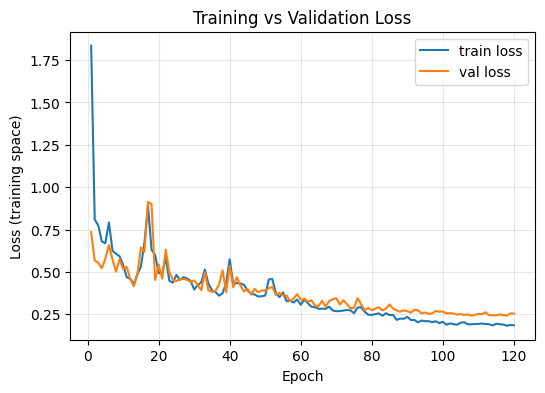

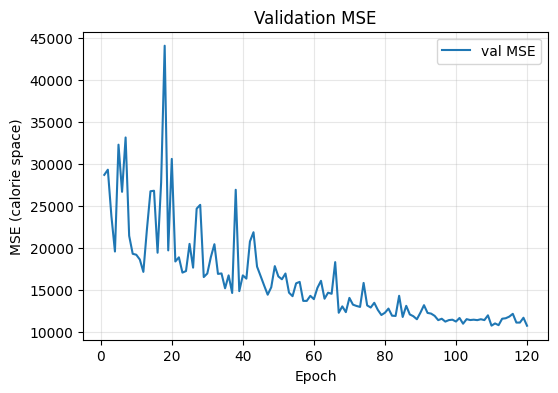

Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


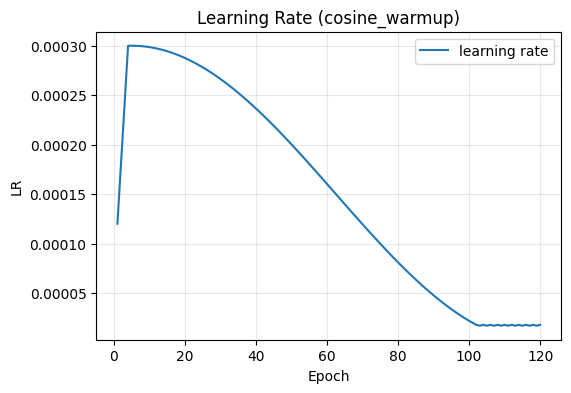

✅ Saved plots:
 - /content/curve_loss.png
 - /content/curve_val_mse.png
 - /content/curve_lr.png


In [ ]:
# ==========================================
# Step 6: Plot curves (loss, MSE, LR) and save images
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

hist_csv = Path.cwd() / "training_history.csv"
hist = pd.read_csv(hist_csv)

plt.figure(figsize=(6,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train loss")
plt.plot(hist["epoch"], hist["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss (training space)")
plt.title("Training vs Validation Loss")
plt.legend(); plt.grid(True, alpha=0.3)
loss_png = Path.cwd() / "curve_loss.png"
plt.savefig(loss_png, dpi=150, bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(hist["epoch"], hist["val_mse"], label="val MSE")
plt.xlabel("Epoch"); plt.ylabel("MSE (calorie space)")
plt.title("Validation MSE")
plt.legend(); plt.grid(True, alpha=0.3)
mse_png = Path.cwd() / "curve_val_mse.png"
plt.savefig(mse_png, dpi=150, bbox_inches="tight")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(hist["epoch"], hist["lr"], label="learning rate")
plt.xlabel("Epoch"); plt.ylabel("LR")
plt.title(f"Learning Rate ({scheduler_mode})")
plt.legend(); plt.grid(True, alpha=0.3)
lr_png = Path.cwd() / "curve_lr.png"
plt.savefig(lr_png, dpi=150, bbox_inches="tight")
plt.show()

print(f"✅ Saved plots:\n - {loss_png}\n - {mse_png}\n - {lr_png}")


In [ ]:
import torch
from pathlib import Path

ckpt_path = Path("/content/vit4ch_best.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# loading
ckpt = torch.load(ckpt_path, map_location=device)
from_model_ema = "model_ema" in ckpt
state_dict = ckpt["model_ema"] if from_model_ema else ckpt["model"]
model.load_state_dict(state_dict)
model.eval()

use_log_target = ckpt["config"]["use_log_target"]
y_mu = ckpt["config"].get("y_mu", 0.0)
y_std = ckpt["config"].get("y_std", 1.0)

print("✅ Model loaded, using EMA:", from_model_ema)


✅ Model loaded, using EMA: False


In [ ]:
from torch.utils.data import DataLoader
import pandas as pd
from pathlib import Path

#
DATA_ROOT = Path("/content/nutrition_data/Nutrition5K/Nutrition5K")
TEST_DIR = DATA_ROOT / "test"
CSV_PATH = DATA_ROOT / "nutrition5k_train.csv"   #

#
test_ids = sorted([p.name for p in (TEST_DIR / "color").iterdir() if p.is_dir()])
test_df = pd.DataFrame({"ID": test_ids})

print(f"✅ Found {len(test_df)} test dishes")
test_df.head()


✅ Found 189 test dishes


,ID
0,dish_3301
1,dish_3302
2,dish_3303
3,dish_3304
4,dish_3305


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ID')):
  _plot_series(series, series_name, i)
  fig.legend(title='ID', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import torch

@torch.no_grad()
def to_pred_calorie(p):
    if use_log_target:
        out = torch.expm1(p * y_std + y_mu)
    else:
        out = p
    return torch.clamp(out, 0.0, 5000.0)


In [ ]:
val_transform = PairedTransform(image_size=224, is_training=False)

test_dataset = NutritionDataset(
    df=test_df,
    root_dir=DATA_ROOT,
    split="test",
    transform=val_transform
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)


In [ ]:
# 1)
from pathlib import Path
import pandas as pd

DATA_ROOT = Path('/content/nutrition_data/Nutrition5K/Nutrition5K')
test_ids = sorted([p.name for p in (DATA_ROOT/'test'/'color').iterdir() if p.is_dir()])
test_df = pd.DataFrame({'ID': test_ids})

# 2)
val_transform = PairedTransform(image_size=224, is_training=False)

# 3)
test_dataset = Nutrition4ChDataset(
    df=test_df,
    split='test',
    transform=val_transform,
    has_label=False,
)

from torch.utils.data import DataLoader
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# 4)
pred_rows = []
model.eval()
with torch.inference_mode():
    for x4, dish_ids in test_loader:
        x4 = x4.to(device).float()
        pred_t = model(x4)
        pred   = to_pred_calorie(pred_t).cpu().numpy().tolist()
        pred_rows.extend(zip(dish_ids, pred))

# 5)
sub = pd.DataFrame(pred_rows, columns=['Id','Value'])
sub.to_csv('submission_vit4ch.csv', index=False)
print('✅ saved submission_vit4ch.csv')


✅ saved submission_vit4ch.csv


[load] missing: []
[load] unexpected: []
MSE=10689.66  MAE=66.40  R2=0.7891
Saved: val_predictions_vit4ch_best.csv


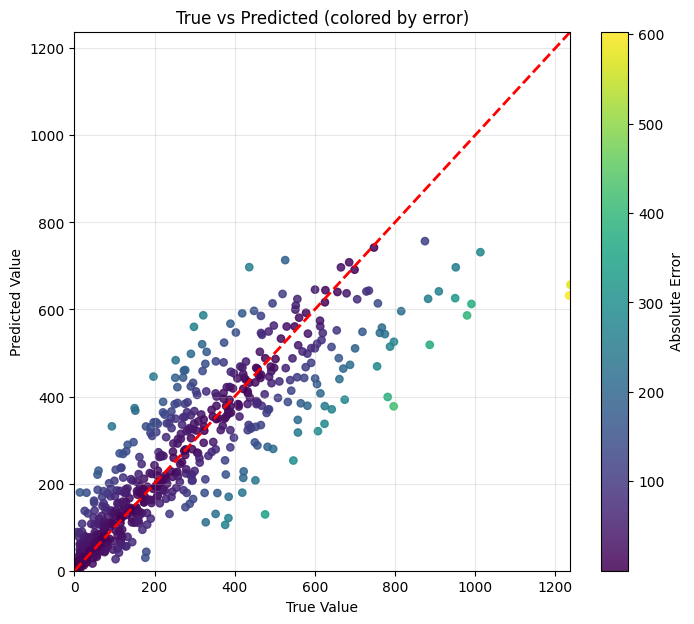

Saved: true_vs_predicted_vit4ch_best.png


In [18]:
# Single cell: load best model, run inference on val_loader, plot once, and save outputs

import torch, numpy as np, pandas as pd, matplotlib.pyplot as plt
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1) Build the model with the same hyperparameters used in training
model = HybridViTRegressor(
    in_ch=4, img=224,
    stem_out=64,
    patch=8, dim=256,
    depth=6, heads=4, mlp_ratio=3.0,
    use_cls=True
).to(device)

# 2) Load the best weights robustly from vit4ch_best.pt
ckpt_path = "/content/vit4ch_best.pt"
ckpt = torch.load(ckpt_path, map_location=device)

state = None
if isinstance(ckpt, dict):
    if "model" in ckpt:
        m = ckpt["model"]
        if isinstance(m, torch.nn.Module):
            state = m.state_dict()
        elif isinstance(m, dict):
            state = m.get("state_dict", m)
    elif "state_dict" in ckpt:
        state = ckpt["state_dict"]
if state is None:
    state = ckpt

clean_state = {k.replace("module.", "").replace("model.", ""): v for k, v in state.items()}
missing, unexpected = model.load_state_dict(clean_state, strict=False)
print("[load] missing:", missing)
print("[load] unexpected:", unexpected)
model.eval()

# 3) Target inverse transform
try:
    to_pred_calorie  # defined elsewhere in your notebook; expects/returns torch.Tensor
except NameError:
    # Fallback: identity mapping on torch tensors
    def to_pred_calorie(p: torch.Tensor) -> torch.Tensor:
        return p

# 4) Inference on val_loader and collect predictions
def unpack_val(batch):
    # Supports (x4, y, did) or (x4, y)
    if isinstance(batch, (tuple, list)):
        if len(batch) >= 3:
            return batch[0], batch[1], batch[2]
        elif len(batch) == 2:
            return batch[0], batch[1], None
    raise ValueError("Unexpected batch structure from val_loader.")

all_true, all_pred, all_id = [], [], []
with torch.no_grad():
    for batch in val_loader:
        x4, y, did = unpack_val(batch)
        x4 = x4.to(device, non_blocking=True).float()


        t_out = model(x4).view(-1)                 # torch.Tensor in transformed space
        y_hat_t = to_pred_calorie(t_out)           # torch.Tensor in calorie space
        y_hat = y_hat_t.detach().cpu().numpy()     # convert to numpy at the end


        y_np = y.view(-1).cpu().numpy().astype(float)

        all_true.append(y_np)
        all_pred.append(y_hat)

        if did is not None:
            if hasattr(did, "cpu"):
                did = did.cpu().numpy().tolist()
            ids = did if isinstance(did, (list, tuple)) else [did]
            all_id.extend([str(d) for d in ids])

y_true = np.concatenate(all_true)
y_pred = np.concatenate(all_pred)
abs_err = np.abs(y_true - y_pred)

# 5) Metrics
mse = float(np.mean((y_true - y_pred) ** 2))
mae = float(np.mean(abs_err))
r2 = 1.0 - float(np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
print(f"MSE={mse:.2f}  MAE={mae:.2f}  R2={r2:.4f}")

# 6) Save per-sample results
df_val_pred = pd.DataFrame({
    "dish_id": all_id[:len(y_true)] if all_id else [None] * len(y_true),
    "y_true": y_true,
    "y_pred": y_pred,
    "abs_err": abs_err
})
df_val_pred.to_csv("val_predictions_vit4ch_best.csv", index=False)
print("Saved: val_predictions_vit4ch_best.csv")

# 7) Plot once and save figure
plt.figure(figsize=(8, 7))
sc = plt.scatter(y_true, y_pred, c=abs_err, s=28, alpha=0.85, cmap="viridis")
low = float(min(y_true.min(), y_pred.min()))
high = float(max(y_true.max(), y_pred.max()))
plt.plot([low, high], [low, high], "r--", lw=2)
plt.xlim(low, high)
plt.ylim(low, high)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("True vs Predicted (colored by error)")
cb = plt.colorbar(sc)
cb.set_label("Absolute Error")
plt.grid(True, alpha=0.3)
plt.savefig("true_vs_predicted_vit4ch_best.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: true_vs_predicted_vit4ch_best.png")
